# Human Trafficking Data

Messing with some human trafficking data I pulled from http://humantraffickingdata.org/.

Sections:
- [How do the judges judge?](#How-do-the-judges-judge?)
- [Who are the victims?](#Who-are-the-victims?)

In [2]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

case_df = pd.read_csv('../data/case_data.csv',index_col='id')
defendant_df = pd.read_csv('../data/defendant_data.csv',index_col='id')
judge_df = pd.read_csv('../data/judge_data.csv',index_col='id')

First, here's what the data looks like.

In [3]:
case_df.head()

,summary,name,number,n_defendants,state,federal_district,year,n_victims,n_minors,n_foreigners,n_females,n_males
id,,,,,,,,,,,,
405,"The defendants, five Ukrainian brothers, recru...",USA v. Botsvynyuk,2:10-cr-00159-PD,5,PA,3,2010.0,30.0,0.0,30.0,2.0,6.0
406,The defendants created an educational institut...,USA v. Kalu,1:12-cr-00106,2,CO,10,2012.0,18.0,0.0,18.0,8.0,NaN
407,The defendants intentionally conspired to recr...,USA v. Kelly,1:07-cr-00374-SJ-1,2,NY,2,2007.0,1.0,1.0,0.0,1.0,NaN
408,The defendants operated a garment factory usin...,"USA v. Lee, et al",1:01-cr-00132-SOM-BMK,3,HI,9,2001.0,21.0,0.0,21.0,0.0,NaN
409,The defendants were involved in the operation ...,USA v. Kim et al,1:06-cr-00605-CBA-RLM,11,NY,2,2006.0,70.0,NaN,70.0,70.0,0.0


In [3]:
defendant_df.head()

,judge_id,case_id,name,gender,arrest_age,race,arrest_date,charge_date,bail_type,bail_amount,...,statute_months_sentenced,statute_months_probation,n_charges,n_sentences,year_terminated,total_months_sentenced,total_months_probation,restitution,forfeiture_charge,forfeiture_sentence
id,,,,,,,,,,,,,,,,,,,,,
1797,0,405,Omelyan Botsvynyuk,Male,51.0,White,2010-12-07,2010-03-17,NaN,NaN,...,1200,0,3.0,3.0,2012.0,1200.0,0.0,"$288,272",false,NaN
1798,0,405,Stepan Botsvynyuk,Male,35.0,White,2010-06-30,2010-03-17,NaN,NaN,...,240,0,3.0,3.0,2012.0,240.0,0.0,"$288,272",false,NaN
1799,0,405,Mykhaylo Botsvynyuk,Male,41.0,White,2010-12-07,2010-03-17,NaN,NaN,...,NaN,NaN,1.0,999.0,NaN,NaN,NaN,NaN,NaN,NaN
1800,0,405,Dmytro Botsvynyuk,Male,NaN,White,2010-12-07,2010-03-17,NaN,NaN,...,NaN,NaN,1.0,999.0,NaN,NaN,NaN,NaN,NaN,NaN
1801,0,405,Yaroslav Botsvynyuk,Male,41.0,White,2010-12-07,2010-03-17,NaN,NaN,...,NaN,NaN,1.0,999.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
judge_df.head()

,name,race,gender,tenure,appointed_by,case_id
id,,,,,,
0,Paul S. Diamond,White,Male,2004.0,Republican,405
1,Marcia S. Krieger,White,Female,2002.0,Republican,406
2,"Sterling Johnson, Jr.",Black,Male,1991.0,Republican,407
3,Barry M. Kurren,White,Male,1992.0,Republican,408
4,Roanne L. Manne,White,Female,1994.0,Democrat,409


In [4]:
axs = pd.plotting.scatter_matrix(case_df[['n_defendants','year','n_victims','n_minors','n_foreigners','n_females','n_males']])
row,col = axs.shape
for x in range(row):
    for y in range(col):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

In [5]:
plt.close()
axs = pd.plotting.scatter_matrix(defendant_df[['arrest_age','n_charges','n_sentences','year_terminated','total_months_sentenced','total_months_probation']])
row,col = axs.shape
for x in range(row):
    for y in range(col):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

# How do the judges judge?

Looking at things like how many cases each judge has had. How long each judge tends to sentence people for. Etc.

<IPython.core.display.Javascript object>


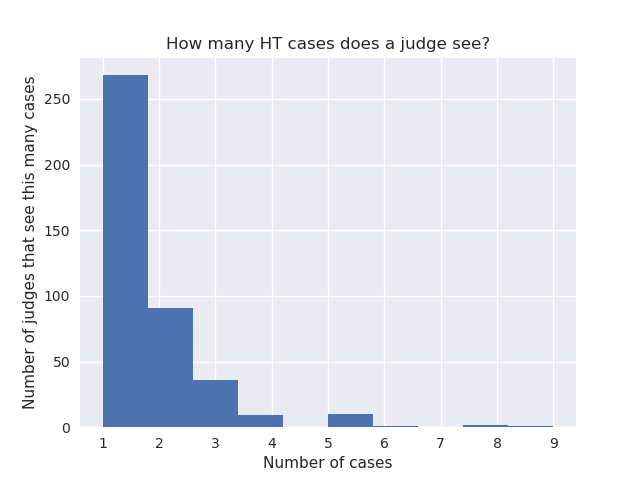

In [7]:
judges = judge_df.name.unique()
case_counts = [list(judge_df.name.values).count(j) for j in judges]

plt.close()
plt.hist(case_counts)
plt.title('How many HT cases does a judge see?')
plt.xlabel('Number of cases')
plt.ylabel('Number of judges that see this many cases')
plt.show()

Ok. So most judges only see 1 case. A few judges have seen more than one.

In [8]:
judge_df.race.unique()

array(['White', 'Black', 'Hispanic', 'Asian', nan, 'Other'], dtype=object)